Imports

In [1]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np

Simulation of 4 cars with a front car with constant velocity plus a sin function and $b=0.2,c=0.2, T=3$.

In [2]:
#Defining variables
# Define number of cars including the leader.
#number_of_cars = 2
constant_leading_speed,omega, amplitude = 28, 2, 1
number_of_cars = 4 
b,c=0.2,0.2
T=3
# Defining constants for adjusted acceleration
c1,c2,c3,c4 = -1,1,-10,10
k,l = 10, 0.1
adjusted_acceleration = False
max_speed = 50
# Defining starting positions
position = [[70*i] for i in range(number_of_cars-1,-1,-1)]
velocity = [[28] for i in range(number_of_cars)]
relative_position = []
for i in range(number_of_cars-1):
    relative_position.append([])
    relative_position[i].append(position[i][0]-position[i+1][0])

Formular for speed of leading car and accelaration:

In [3]:
#Speed of leading car
def v_f(c,t,omega,amplitude_local):
    return c+amplitude_local*np.cos(omega*t)

#Defining the accelaration function by the PD controller
def acc(d,v_self,v_front,T_local):
    return b*(v_front-v_self)+c*(d-v_front*T_local)

#Defining adjusted accelaration function
# c1 is the lower limit of the 'rate-zero'. 
# c2 is the upper limit of the 'rate-zero'. 
# c3 is the lower limit, where the acceleration becomes constant.
# c4 is the upper limit, where the acceleration becomes constant.
def acc_adj(a, v_self, c1, c2, c3, c4, k, l):
    g = (c4/2)*((max_speed-v_self)/max_speed)*(np.abs(np.tanh(l*a))+np.tanh(l*a))+(c3/2)*((max_speed+v_self)/max_speed)*(np.abs(np.tanh(l*a))-np.tanh(l*a))
    f = 1+ 1/2*(np.tanh(k * (g - c2)) - np.tanh(k * (g - c1)))
    z = f*g 
    return z


Simulation code using eulers method.

In [4]:
time_steps = 100000
time_period = 120
step_size = time_period/time_steps

# Using eulers method
for i in range(time_steps):
    for j in range(number_of_cars):
        position[j].append(position[j][i] + velocity[j][i]*step_size)
        if j != 0:
            relative_position[j-1].append(position[j-1][i] - position[j][i])
        if j == 0:
            velocity[j].append(v_f(constant_leading_speed,(i*step_size),omega,amplitude))
        else:
            if adjusted_acceleration:
                a_temp = acc(relative_position[j-1][i],velocity[j][i],velocity[j-1][i],T)
                a = acc_adj(a_temp, velocity[j][i], c1,c2,c3,c4,k,l)
            else:
                a = acc(relative_position[j-1][i],velocity[j][i],velocity[j-1][i],T)
            velocity[j].append(velocity[j][i] + a*step_size)

Plotting

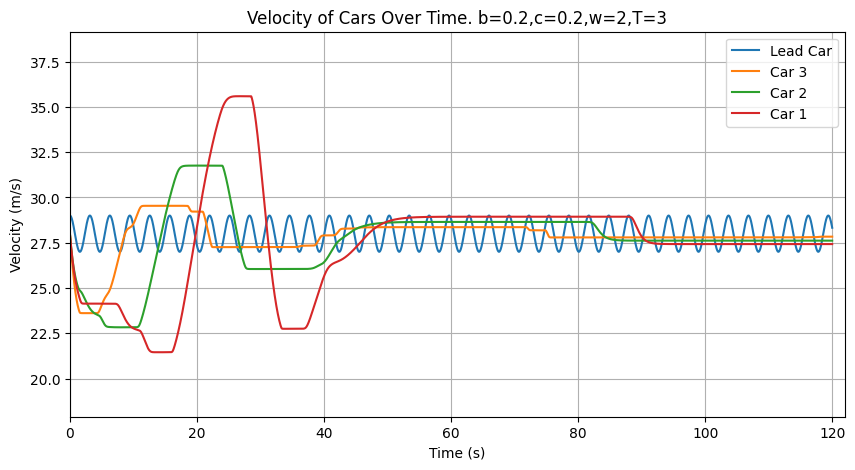

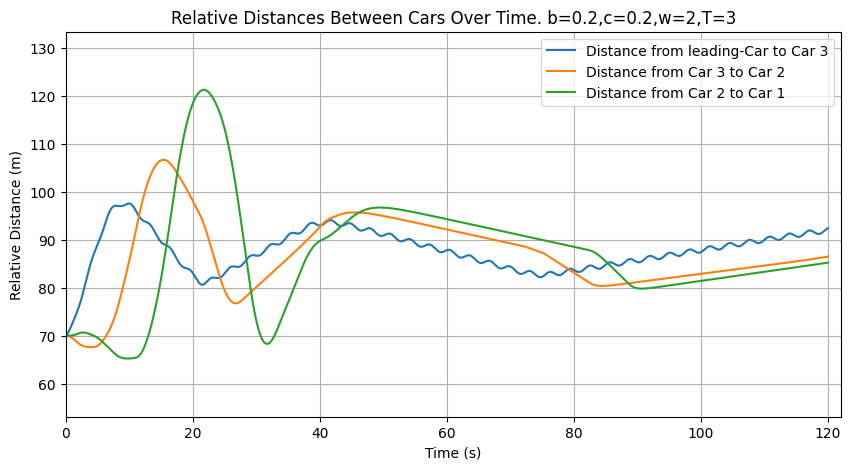

In [5]:
# Create time array
time = [i * step_size for i in range(time_steps+1)]

# Plot velocities
plt.figure(figsize=(10, 5))
for i in range(number_of_cars):
    if i == 0:
        plt.plot(time, velocity[i], label="Lead Car")
    else:
        plt.plot(time, velocity[i], label="Car "+str(number_of_cars-i))
plt.title(f"Velocity of Cars Over Time. b={b},c={c},w={omega},T={T}")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid(True)
plt.xlim(0, time_period+2) 
plt.ylim(min(min(row) for row in velocity)-0.1*max(max(row) for row in velocity), 1.1*max(max(row) for row in velocity))  

plt.show()
plt.show()

# Plot relative distances
plt.figure(figsize=(10, 5))
for i in range(number_of_cars-1):
    if i == 0:
        plt.plot(time, relative_position[i], label="Distance from leading-Car to Car "+str(number_of_cars-1))
    else:
        plt.plot(time, relative_position[i], label="Distance from Car "+str(number_of_cars-i)+" to Car "+str(number_of_cars-i-1)) 
plt.title(f"Relative Distances Between Cars Over Time. b={b},c={c},w={omega},T={T}")
plt.xlabel("Time (s)")
plt.ylabel("Relative Distance (m)")
plt.legend()
plt.grid(True)
plt.xlim(0, time_period+2) 
plt.ylim(min(min(row) for row in relative_position)-0.1*max(max(row) for row in relative_position), 1.1*max(max(row) for row in relative_position))  

plt.show()


## Plots for exercise 6

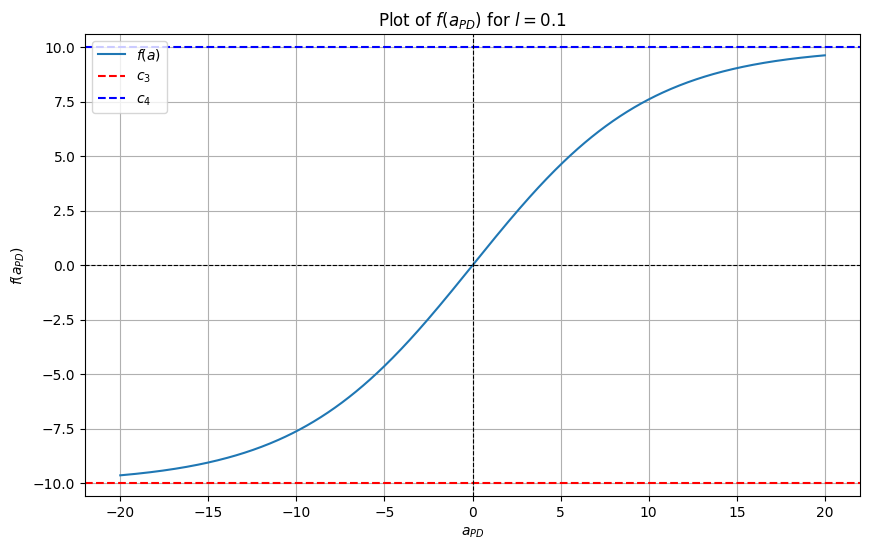

In [6]:
def f(a):
    term1 = 0.5 * c4 * (np.abs(np.tanh(l * a)) + np.tanh(l * a))
    term2 = 0.5 * c3 * (np.abs(np.tanh(l * a)) - np.tanh(l * a))
    return term1 + term2

# Generate the range for a
a = np.linspace(-20, 20, 500)

f_values = f(a)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(a, f_values, label=r'$f(a)$')

# Add horizontal lines for c3 and c4
plt.axhline(c3, color='red', linewidth=1.5, linestyle='--', label=r'$c_3$')
plt.axhline(c4, color='blue', linewidth=1.5, linestyle='--', label=r'$c_4$')

plt.title(r'Plot of $f(a_{PD})$ for $l=0.1$')
plt.xlabel(r'$a_{PD}$')  
plt.ylabel(r'$f(a_{PD})$')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

Generate plot for $g$

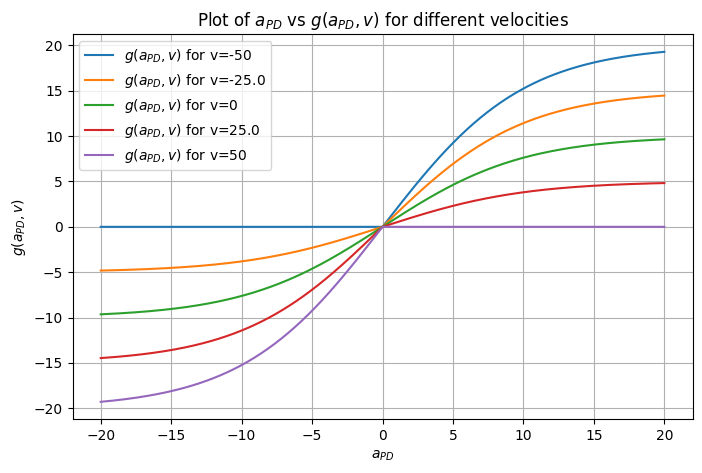

In [7]:
def g(a,v): 
    term1 = (c4/2)*((max_speed-v)/max_speed)*(np.abs(np.tanh(l*a))+np.tanh(l*a))
    term2 = (c3/2)*((max_speed+v)/max_speed)*(np.abs(np.tanh(l*a))-np.tanh(l*a))
    return term1 + term2

# Generate the range for a
a = np.linspace(-20, 20, 500)
v = [-max_speed, -max_speed/2, 0, max_speed/2, max_speed]

plt.figure(figsize=(8, 5))
for vel in v:
    g_values = g(a, vel)
    plt.plot(a, g_values, label=f'$g(a_{{PD}},v)$ for v={vel}')

# Additional plot details
plt.title(r'Plot of $a_{PD}$ vs $g(a_{PD},v)$ for different velocities')
plt.xlabel(r'$a_{PD}$')
plt.ylabel(r'$g(a_{PD},v)$')
plt.legend()
plt.grid(True)
plt.show()

Function for the cutoff given by $h$

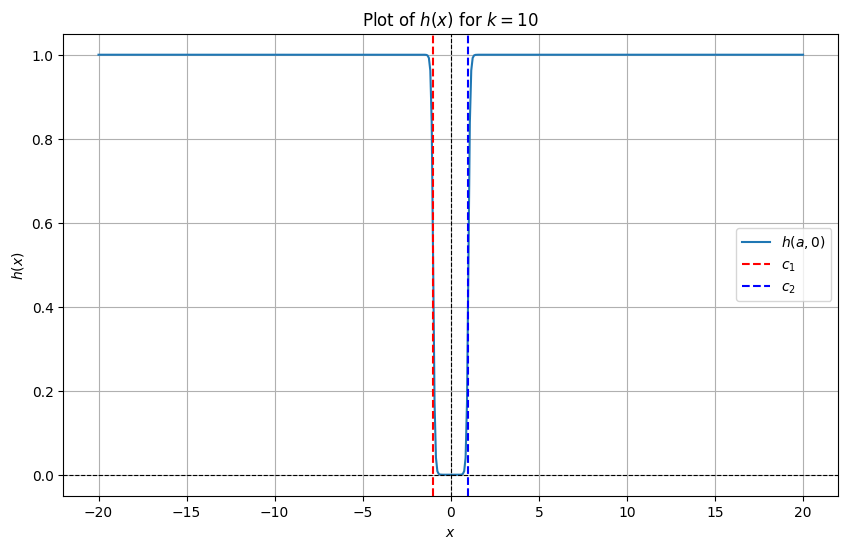

In [8]:
def h(x):
    return 1 + 0.5 * np.tanh(k * (x - c2)) - 0.5 * np.tanh(k * (x - c1))

# Generate the range for a
a = np.linspace(-20, 20, 500)

h_values = h(a)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(a, h_values, label=r'$h(a, 0)$')

# Add horizontal lines for c3 and c4
plt.axvline(c1, color='red', linewidth=1.5, linestyle='--', label=r'$c_1$')
plt.axvline(c2, color='blue', linewidth=1.5, linestyle='--', label=r'$c_2$')

plt.title(r'Plot of $h(x)$ for $k=10$')
plt.xlabel(r'$x$')  
plt.ylabel(r'$h(x)$')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend()
plt.show()


Plotting $a_{adj}$ against ${a_PD}:

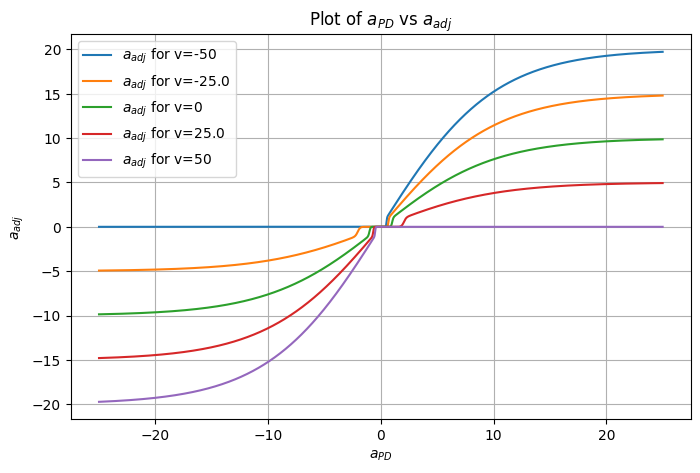

In [9]:
# Generate data for a
a_values = np.linspace(-25, 25, 5000)
v = [-max_speed, -max_speed/2, 0, max_speed/2, max_speed]

# Plot
plt.figure(figsize=(8, 5))
for vel in v:
    g_values = g(a_values, vel)
    a_adjusted = h(g_values) * g_values
    plt.plot(a_values, a_adjusted, label=f'$a_{{adj}}$ for v={vel}')

# Additional plot details
plt.title(r'Plot of $a_{PD}$ vs $a_{adj}$')
plt.xlabel(r'$a_{PD}$')
plt.ylabel(r'$a_{adj}$')
plt.legend()
plt.grid(True)
plt.show()